In [16]:
from sklearn.linear_model import Lasso
import numpy as np
import random
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import math

np.set_printoptions(suppress=True)

In [83]:
# 加载数据
file_path = r'C:\Users\海棠微雨\Desktop\数据处理\铅钡.xlsx'  # 数据文件路径
df = pd.read_excel(file_path, sheet_name='Sheet1')  # 从Excel文件中加载数据，读取名为'表单1'的工作表

# 将空值赋值为0
df = df.fillna(0)
# 提取特征矩阵X（去除第一列和最后一列）
X = df.iloc[:, 1:-1].values

# 标准化特征矩阵X
scaler = preprocessing.MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# 提取标签y（最后一列）
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.1)


(0.0, 0.25)

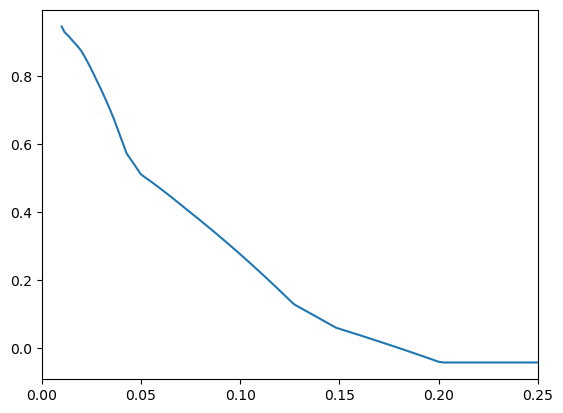

In [86]:
r2, coefs = [], []
alpha_range = np.logspace(-2, 3, 1000)

for a in alpha_range:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    r2.append(lasso.score(X_test, y_test))
    coefs.append(lasso.coef_)
    
plt.plot(alpha_range, r2)
plt.gca().set_xlim(0, 0.25)

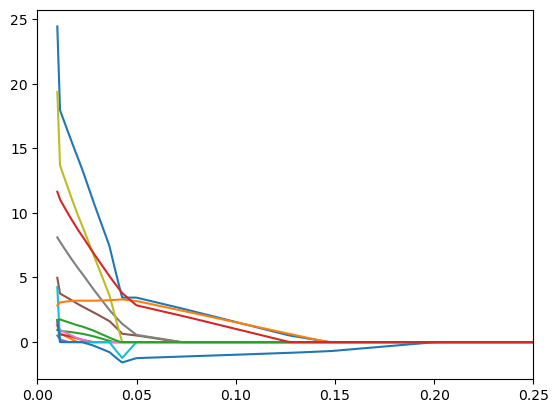

In [87]:
plt.plot(alpha_range, coefs)
plt.gca().set_xlim(0, 0.25)
plt.show()

In [100]:
lasso1 = Lasso(alpha = 0.045, max_iter=100000)
lasso1.fit(X_normalized, y)
print(lasso1.score(X_test, y_test))
lasso1.coef_

0.6060609917727466


array([ 3.86926993, -0.        ,  0.        ,  0.        ,  0.        ,
        0.50514933,  0.        ,  0.82708706,  0.        , -0.46175664,
       -1.42283563,  3.12692713,  0.        ,  3.41206042])

In [101]:
# 输出非零系数对应的特征
selected_features = df.columns[1:-1][lasso1.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['二氧化硅(SiO2)', '氧化铝(Al2O3)', '氧化铜(CuO)', '氧化钡(BaO)', '五氧化二磷(P2O5)',
       '氧化锶(SrO)', '二氧化硫(SO2)'],
      dtype='object')


In [104]:
# 在原始数据框中提取这些特征列
selected_df = df[list(selected_features)]

# 保存为 Excel 表格
selected_df.to_excel('selected_features_data_be.xlsx', index=False)
